In [126]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile, f_classif
from sklearn import preprocessing
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn import linear_model
from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score

# Dataset 4

Trabalho realizado por:
    António da Cruz Castelo Carneiro Rocha – A84647
    Guilherme de Sousa Mota – A90032
    Lara Alexandra Pereira Novo Martins Vaz – A88362
    Mariana Lindo Carvalho – A88360
Grupo 8

## Secção 1

### Dados

In [127]:
#Leitura dos dados usando pandas
data_ucec = pd.read_csv('data_RNA_Seq_v2_expression_median.txt', sep='\t')

In [128]:
#Dimensão dos dados. Para confirmar se a leitura dos dados está correta. 
data_ucec.shape

(20531, 529)

In [129]:
#Para ver como cada linha do dataset se organiza
data_ucec.head()

,Hugo_Symbol,Entrez_Gene_Id,TCGA-2E-A9G8-01,TCGA-4E-A92E-01,TCGA-5B-A90C-01,TCGA-5S-A9Q8-01,TCGA-A5-A1OH-01,TCGA-A5-A2K2-01,TCGA-A5-A2K3-01,TCGA-A5-A2K4-01,...,TCGA-FI-A2D2-01,TCGA-FI-A2D4-01,TCGA-FI-A2D5-01,TCGA-FI-A2D6-01,TCGA-FI-A2EU-01,TCGA-FI-A2EW-01,TCGA-FI-A2EX-01,TCGA-FI-A2F4-01,TCGA-FI-A2F8-01,TCGA-FI-A2F9-01
0,NaN,100130426,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,100133144,12.1093,40.1548,19.6761,23.1153,18.1558,4.8869,0.0000,12.2708,...,12.668177,9.747083,22.189278,17.688211,22.899596,3.429539,7.532125,9.306442,8.873913,6.007172
2,NaN,100134869,19.3502,62.3042,11.3248,19.9139,29.7106,5.7258,7.4006,5.5286,...,22.695778,16.229526,42.620773,36.374638,16.282690,11.435871,9.578114,22.995098,11.334259,13.867230
3,NaN,10357,83.4812,125.2100,223.7690,58.2272,217.0690,149.8170,126.4290,191.6830,...,280.608252,416.360437,251.606060,496.102307,378.626299,224.552801,290.533155,324.106278,355.788566,131.976564
4,NaN,10431,1376.4800,542.8050,729.4690,896.7300,1173.6500,1297.2800,1946.3500,988.1340,...,1241.525697,1755.841047,1034.560586,1082.218341,432.900853,1543.184285,2108.417696,791.875653,1291.505139,765.041963


In [130]:
#Para remover as linhas com "Hugo Symbol" e NaN
data_ucec_hugo = data_ucec[data_ucec.notna()['Hugo_Symbol']]          
data_ucec_hugo = data_ucec_hugo.set_index("Hugo_Symbol")
del data_ucec_hugo["Entrez_Gene_Id"]

In [131]:
data_ucec_hugo.shape
# 20502 genes x 527 amostras

(20502, 527)

In [132]:
#Colocar a matriz de genes (nas colunas) e amostras (nas linhas)
data_final = data_ucec_hugo.transpose()

In [133]:
data_final.shape
#Confirmar se foi bem executado. Agora tem-se 527 amostras (nas linhas) e 20502 dados de RNAseq (expressão genética) nas colunas

(527, 20502)

In [134]:
#O describe gera sumários de cada variável dos dados de expressão (estatística descritiva)
data_final.describe()
#describe ajuda a perceber como os dados se organizam nas métricas.
#Os genes não estão dentro dos mesmos ranges de variação, logo não houve pre-processamento.
#É de realçar que todas essas métricas se aplicam a variáveis numéricas.

Hugo_Symbol,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
count,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,173.000000,173.000000,527.000000,...,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000,527.000000
mean,131.485821,2.650857,1.464739,128.408142,7989.669099,87.097767,1425.479887,0.372836,0.182076,1106.570828,...,541.439597,1149.309339,30.623079,310.109718,1036.386810,34.764093,739.999090,5126.604346,940.625234,691.424141
std,207.901438,25.937965,9.120243,63.803675,6080.173549,265.880413,1113.206499,0.557878,0.543548,366.358303,...,231.055477,645.988345,18.140706,129.443855,295.847973,63.963605,286.815391,2373.922044,358.732545,241.892083
min,3.293124,0.000000,-0.330564,16.023898,1039.152417,-0.321153,29.044795,0.000000,0.000000,401.829000,...,137.812000,93.181321,0.000000,10.026063,244.639000,-0.402069,191.605790,1230.230000,139.375000,122.062000
25%,38.506877,0.032752,-0.330564,81.637840,4115.038212,3.937920,644.520288,0.000000,0.000000,864.347126,...,380.854000,695.360103,17.257400,218.055736,845.560517,1.854451,561.212000,3657.719460,707.909719,536.243733
50%,69.757165,0.065503,0.000000,121.782867,6512.411869,17.515900,1169.050000,0.000000,0.000000,1028.244988,...,509.951199,1030.140000,27.513392,298.712000,986.424000,9.204604,700.475000,4612.320000,905.185935,676.438000
75%,147.343500,0.349150,0.683414,163.084698,9913.979696,50.661609,1843.057310,0.569800,0.000000,1257.510565,...,654.612347,1482.970000,40.932778,379.635500,1173.049620,37.108752,890.396309,5966.713706,1112.697423,831.434741
max,2548.740000,475.517039,141.405000,404.436000,44123.620712,3696.490000,7926.670000,2.640100,5.133600,3181.297229,...,2171.480172,4145.418699,114.022114,896.907940,2258.166433,623.713000,2132.488320,22216.065853,3570.353911,2792.483540


In [135]:
#Para ver como cada linha do dataset se organiza. Permite associar os diferentes tipos de cancro aos vários RNAseq
data_final.head()

Hugo_Symbol,A1BG,A1CF,A2BP1,A2LD1,A2M,A2ML1,A4GALT,A4GNT,AAA1,AAAS,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
TCGA-2E-A9G8-01,24.2393,0.5157,0.0000,73.8834,6611.91,9.2831,361.011,0.0000,0.0,1195.980,...,555.663,1305.830,26.3022,230.531,1055.700,56.7303,708.613,6333.68,180.505,653.430
TCGA-4E-A92E-01,19.8087,0.0000,1.3661,164.3720,13119.30,78.7796,1274.590,0.4554,0.0,767.760,...,599.030,656.193,74.2259,476.321,1106.560,1.3661,695.355,3875.23,1270.490,897.996
TCGA-5B-A90C-01,9.0662,0.3163,1.5817,75.2467,3898.10,60.4200,962.608,0.0000,0.0,965.455,...,907.718,1319.430,27.5212,188.536,1095.470,13.2861,719.346,4126.59,363.153,1092.940
TCGA-5S-A9Q8-01,60.9811,0.0000,0.0000,71.9793,4464.32,25.8176,1535.280,0.0000,0.0,2113.600,...,481.515,621.342,10.3270,187.608,910.499,17.2117,378.658,2301.20,795.181,659.208
TCGA-A5-A1OH-01,251.1470,0.0000,2.2263,239.0980,7509.76,7.0501,239.703,0.3711,0.0,1706.490,...,948.627,1434.510,15.5844,211.503,1561.780,41.9295,704.267,3722.08,570.687,637.106


In [136]:
data_final.dtypes
#Existem variáveis numéricas ("float64") e não numéricas ("object"), são variáveis categóricas.

Hugo_Symbol
A1BG      float64
A1CF      float64
A2BP1     float64
A2LD1     float64
A2M       float64
           ...   
ZYG11A    float64
ZYG11B    float64
ZYX       float64
ZZEF1     float64
ZZZ3      float64
Length: 20502, dtype: object

In [137]:
data_final.isnull().sum().sum() #Verificar se existem valores nulos
#Para ver se há valores nulos. Se a dupla soma der 0, não se faz mais nada pois não há valores nulos.
#Neste caso verifica-se que existem 1064832 valores nulos

1064832

In [138]:
#Como existem valores nulos, então faz-se a listagem para ver o número de missing values por variável.
#Como são muitos, não é possível visualizar, mas sabe-se que são de variáveis numéricas, pois, dtype é int64
data_final.isnull().sum() 

Hugo_Symbol
A1BG      0
A1CF      0
A2BP1     0
A2LD1     0
A2M       0
         ..
ZYG11A    0
ZYG11B    0
ZYX       0
ZZEF1     0
ZZZ3      0
Length: 20502, dtype: int64

In [139]:
#Calcular a média dos valores de expressão genética para cada gene
data_media = data_final.apply(lambda x:(x.mean()))
print(data_media)

Hugo_Symbol
A1BG       131.485821
A1CF         2.650857
A2BP1        1.464739
A2LD1      128.408142
A2M       7989.669099
             ...     
ZYG11A      34.764093
ZYG11B     739.999090
ZYX       5126.604346
ZZEF1      940.625234
ZZZ3       691.424141
Length: 20502, dtype: float64


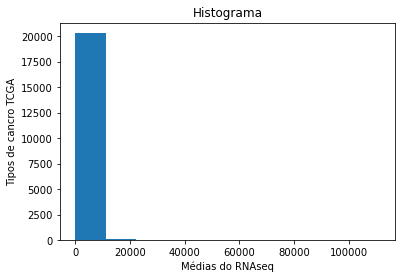

In [140]:
plt.hist(data_media)
plt.xlabel('Médias do RNAseq')
plt.ylabel('Tipos de cancro TCGA')
plt.title(r'Histograma')
plt.show()

#Pela análise do gráfico, verifica-se que a maior parte dos genes tem médias entre 0 e 100000.

In [141]:
#Para cada coluna obteve-se o valor mínimo e máximo.
data_maxmin = data_final.apply(lambda x: str(x.min())+"---"+str( x.max()))
print(data_maxmin)

Hugo_Symbol
A1BG                3.2931243838521405---2548.74
A1CF                    0.0---475.51703875620996
A2BP1             -0.33056397394042203---141.405
A2LD1                 16.0238984401377---404.436
A2M          1039.15241685296---44123.6207121039
                           ...                  
ZYG11A    -0.402069011677867---623.7130000000001
ZYG11B       191.605790167785---2132.48832000625
ZYX                   1230.23---22216.0658526369
ZZEF1               139.375---3570.3539106726003
ZZZ3        122.06200000000001---2792.4835395146
Length: 20502, dtype: object


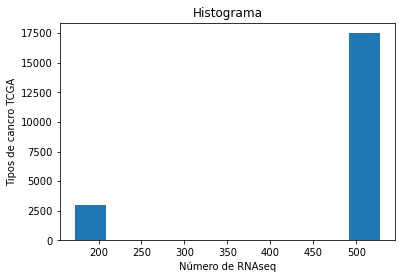

In [142]:
#Verifica-se que os números de RNA seq predominam para valores aproximadamente entre 50 e 220 e um pouco maior que 500.
data_count = data_final.apply(lambda x: x.count())
plt.hist(data_count)
plt.xlabel('Número de RNAseq')
plt.ylabel('Tipos de cancro TCGA')
plt.title(r'Histograma')
plt.show()

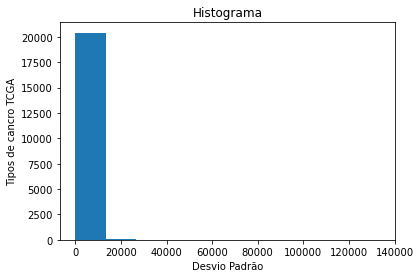

In [143]:
#Verifica-se que o desvio padrão aprsenta um comportamento semelhante à média.
data_desvio = data_final.apply(lambda x: x.std())
plt.hist(data_desvio)
plt.xlabel('Desvio Padrão')
plt.ylabel('Tipos de cancro TCGA')
plt.title(r'Histograma')
plt.show()

### Metadados

In [144]:
#Leitura dos metadados usando pandas
#index_col = 0 a 1ª coluna dá os nomes associados à linha. 
data_patient=pd.read_csv('data_clinical_patient.txt', sep='\t', index_col = 0)
data_sample=pd.read_csv('data_clinical_sample.txt', sep='\t', index_col = 0)

In [145]:
# Dimensao dos metadados das amostras
data_sample.shape
#nº amostras dos metadados é superior ao número de amostras nos metadados. Isto não pode acontecer, tem de ser iguais.

(533, 51)

In [146]:
# Dimensao dos metadados dos pacientes
data_patient.shape
#nº amostras dos metadados é superior ao número de amostras nos metadados. Isto não pode acontecer, tem de ser iguais.

(533, 37)

In [147]:
#Para ver como cada linha dos metadados dos pacientes se organiza
data_patient.head()

#Existem 37 atributos (nas 37 colunas), isto é para cada paciente que possui um tipo de cancro TCGA é possível saber qual 
#a idade de diagonóstico da doença, o sexo, o acrónimo do tipo de cancro, Neoplasm Disease Stage American Joint Committee 
#on Cancer Code, meses de sobrevivência específica da doença e muitos outros atributos que se podem visualizar
#nas colunas da tabela.

,Subtype,TCGA PanCanAtlas Cancer Type Acronym,Other Patient ID,Diagnosis Age,Sex,Neoplasm Disease Stage American Joint Committee on Cancer Code,American Joint Committee on Cancer Publication Version Type,Last Communication Contact from Initial Pathologic Diagnosis Date,Birth from Initial Pathologic Diagnosis Date,Last Alive Less Initial Pathologic Diagnosis Date Calculated Day Value,...,Center of sequencing,In PanCan Pathway Analysis,Overall Survival Status,Overall Survival (Months),Disease-specific Survival status,Months of disease-specific survival,Disease Free Status,Disease Free (Months),Progression Free Status,Progress Free Survival (Months)
#Patient Identifier,,,,,,,,,,,,,,,,,,,,,
#Identifier to uniquely specify a patient.,Subtype,Text field to hold cancer type acronym used by...,Legacy DMP patient identifier (DMPnnnn),Age at which a condition or disease was first ...,Sex,"The extent of a cancer, especially whether the...",The version or edition of the American Joint C...,Time interval from the date of last followup t...,Time interval from a person's date of birth to...,Time interval from the last day on which a per...,...,Center of sequencing,Patient Part of PanCan Pathway Analysis,Overall patient survival status.,Overall survival in months since initial diago...,The time period usually begins at the time of ...,The time period (months) usually begins at the...,Disease free status since initial treatment.,Disease free (months) since initial treatment.,Progression Free Status,Progress Free Survival (Months)
#STRING,STRING,STRING,STRING,NUMBER,STRING,STRING,STRING,NUMBER,NUMBER,NUMBER,...,STRING,STRING,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER,STRING,NUMBER
#1,1,1,1,1,1,1,1,1,1,1,...,1,1,9,1,1,1,1,1,1,1
PATIENT_ID,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
TCGA-2E-A9G8,UCEC_CN_HIGH,UCEC,9583C10B-B21A-4863-98FA-61E735E64EA5,59,Female,NaN,2009,1249,NaN,0,...,University of Kansas Medical Center,Yes,LIVING,41.062563698,ALIVE OR DEAD TUMOR FREE,41.062563698,NaN,NaN,PROGRESSION,11.013577933


In [148]:
#Como nº de amostras dos metadados dos pacientes é superior, então serão removidas 533 - 529 = 4 linhas
data_patient.columns = data_patient.iloc[3].values
data_patient = data_patient[4:]

#Para ver como cada linha dos metadados dos pacientes se organiza
data_patient.head()

#Se se reparar as linhas iniciais do head anterior já não estão nesta tabela, logo foram removidas. 
#Os atributos permanecem os mesmos (37).

,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
#Patient Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8,UCEC_CN_HIGH,UCEC,9583C10B-B21A-4863-98FA-61E735E64EA5,59,Female,NaN,2009,1249,NaN,0,...,University of Kansas Medical Center,Yes,LIVING,41.062563698,ALIVE OR DEAD TUMOR FREE,41.062563698,NaN,NaN,PROGRESSION,11.013577933
TCGA-4E-A92E,UCEC_CN_LOW,UCEC,B43DE98D-4BB1-41A1-91F2-CE4E7EA4D0CA,54,Female,NaN,2009,13,-19818,0,...,Molecular Response,Yes,LIVING,0.4273925765,ALIVE OR DEAD TUMOR FREE,0.4273925765,DiseaseFree,0.4273925765,CENSORED,0.4273925765
TCGA-5B-A90C,UCEC_CN_HIGH,UCEC,16AC4341-CF8F-45E2-B90B-2D12D5F74A59,69,Female,NaN,2009,1202,-25518,0,...,Medical College of Wisconsin,Yes,LIVING,39.517375152,ALIVE OR DEAD TUMOR FREE,39.517375152,NaN,NaN,PROGRESSION,16.997074005
TCGA-5S-A9Q8,UCEC_CN_LOW,UCEC,8751429B-4A11-451E-B978-DC9E9DB0EB36,51,Female,NaN,2009,313,-18785,0,...,Holy Cross,Yes,LIVING,10.290298189,ALIVE OR DEAD TUMOR FREE,10.290298189,DiseaseFree,10.290298189,CENSORED,10.290298189
TCGA-A5-A0G1,UCEC_POLE,UCEC,53707bb3-426a-43cb-830f-3eeed930295f,67,Female,NaN,NaN,NaN,-24477,0,...,Cedars Sinai,Yes,DECEASED,106.88102048,ALIVE OR DEAD TUMOR FREE,106.88102048,DiseaseFree,106.88102048,CENSORED,106.88102048


In [149]:
#Pelo shape, verifica-se que agora o nº amostras dos metadados dos pacientes é igual a 529 (mais 2 amostras que nos dados)
data_patient.shape

(529, 37)

In [150]:
#O describe gera sumários de cada variável dos dados de expressão (estatística descritiva)
data_patient.describe()
#describe ajuda a perceber como os metadados se organizam nas métricas.
#Os genes não estão dentro dos mesmos ranges de variação, logo não houve pre-processamento.
#É de realçar que as métricas aqui utilizadas são para variáveis não numéricas.

,SUBTYPE,CANCER_TYPE_ACRONYM,OTHER_PATIENT_ID,AGE,SEX,AJCC_PATHOLOGIC_TUMOR_STAGE,AJCC_STAGING_EDITION,DAYS_LAST_FOLLOWUP,DAYS_TO_BIRTH,DAYS_TO_INITIAL_PATHOLOGIC_DIAGNOSIS,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
count,507,529,529,526,529,0,456,487,525,523,...,529,529,529,528,527,528,414,414,529,528
unique,4,1,529,59,1,0,3,443,519,1,...,29,2,2,475,2,475,2,380,2,466
top,UCEC_CN_HIGH,UCEC,EC2040A3-788B-4F2C-A093-C5C4B3DC4B6C,60,Female,NaN,2009,513,-24488,0,...,Mayo Clinic,Yes,LIVING,16.865568597,ALIVE OR DEAD TUMOR FREE,16.865568597,DiseaseFree,16.865568597,CENSORED,22.487424795
freq,163,529,1,28,529,NaN,277,3,2,523,...,76,507,442,3,469,3,359,3,410,3


In [151]:
#Como nº de amostras dos metadados das amostras é superior, então serão removidas 533 - 529 = 4 linhas
data_sample.columns = data_sample.iloc[3].values
data_sample = data_sample[4:]

#Para ver como cada linha dos metadados das amostras se organiza
data_sample.head()

#Existem 51 atributos (nas 51 coluna), isto é para cada paciente que possui um tipo de cancro TCGA é possível saber qual 
#o tipo de cancro, o tipo de tumor, o grau do tumor, a origem do tecido tumural e muitos outros atributos que se podem 
#visualizar nas colunas da tabela.

,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE,TUMOR_TISSUE_SITE,...,STATUS_17Q,STATUS_18P,STATUS_18Q,STATUS_19P,STATUS_19Q,STATUS_20P,STATUS_20Q,STATUS_21_21Q,STATUS_22_22Q,SAMPLE_TYPE
#Patient Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8,TCGA-2E-A9G8-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G2,No,Yes,2E,Uterus,...,NaN,NaN,NaN,NaN,NaN,Lost,Gained,Not Called,Lost,Primary
TCGA-4E-A92E,TCGA-4E-A92E-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G1,Yes,No,4E,Uterus,...,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Primary
TCGA-5B-A90C,TCGA-5B-A90C-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G2,No,Yes,5B,Uterus,...,NaN,Gained,Gained,NaN,NaN,Not Called,Gained,Not Called,Not Called,Primary
TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G2,Yes,No,5S,Uterus,...,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Primary
TCGA-A5-A0G1,TCGA-A5-A0G1-01,USC,Endometrial Carcinoma,Uterine Serous Carcinoma/Uterine Papillary Ser...,Serous Endometrial Adenocarcinoma,G3,No,Yes,A5,Uterus,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Primary


In [152]:
#Pelo shape, verifica-se que agora o nº amostras dos metadados das amostras é igual a 529 (mais 2 amostras que nos dados)
data_sample.shape

(529, 51)

In [153]:
#O describe gera sumários de cada variável dos dados de expressão (estatística descritiva).
data_sample.describe()
#describe ajuda a perceber como os metadados se organizam nas métricas.
#Os genes não estão dentro dos mesmos ranges de variação, logo não houve pre-processamento.
#É de realçar que as métricas aqui utilizadas são para variáveis não numéricas.

,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE,TUMOR_TISSUE_SITE,...,STATUS_17Q,STATUS_18P,STATUS_18Q,STATUS_19P,STATUS_19Q,STATUS_20P,STATUS_20Q,STATUS_21_21Q,STATUS_22_22Q,SAMPLE_TYPE
count,529,529,529,529,529,529,524,529,529,529,...,445,497,476,408,454,492,481,493,467,529
unique,529,3,1,3,3,4,2,2,30,2,...,3,3,3,3,3,3,3,3,3,1
top,TCGA-B5-A1N2-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G3,No,Yes,D1,Uterus,...,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Not Called,Primary
freq,1,399,529,399,399,302,416,421,76,528,...,376,411,399,368,405,418,396,426,372,529


In [154]:
#Juntaram-se os dois metadados (de pacientes e de amostras). 
#Como os dois tinham 529 linhas, o número de linhas ficou igual.
#O número de colunas corresponde à soma das colunas dos dois metadados. 88 = 37 + 51.
unified_meta = data_sample.join(data_patient)

In [155]:
#Pelo shape confirma-se o que anteriormente foi referido.
unified_meta.shape

(529, 88)

In [156]:
#Para ver como cada linha dos metadados (dos pacientes e amostras) se organiza
unified_meta.head()
#Existem 88 atributos, isto é para cada paciente que possui um tipo de cancro TCGA é possível saber o tipo de cancro,
#o tipo de tumor, o grau do tumor, a origem do tecido tumural e muitos outros atributos que se podem visualizar nas 
#colunas da tabela. Correspondem ao total de atributos dos metadados de pacientes e de amostras.

,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE,TUMOR_TISSUE_SITE,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
#Patient Identifier,,,,,,,,,,,,,,,,,,,,,
TCGA-2E-A9G8,TCGA-2E-A9G8-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G2,No,Yes,2E,Uterus,...,University of Kansas Medical Center,Yes,LIVING,41.062563698,ALIVE OR DEAD TUMOR FREE,41.062563698,NaN,NaN,PROGRESSION,11.013577933
TCGA-4E-A92E,TCGA-4E-A92E-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G1,Yes,No,4E,Uterus,...,Molecular Response,Yes,LIVING,0.4273925765,ALIVE OR DEAD TUMOR FREE,0.4273925765,DiseaseFree,0.4273925765,CENSORED,0.4273925765
TCGA-5B-A90C,TCGA-5B-A90C-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G2,No,Yes,5B,Uterus,...,Medical College of Wisconsin,Yes,LIVING,39.517375152,ALIVE OR DEAD TUMOR FREE,39.517375152,NaN,NaN,PROGRESSION,16.997074005
TCGA-5S-A9Q8,TCGA-5S-A9Q8-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G2,Yes,No,5S,Uterus,...,Holy Cross,Yes,LIVING,10.290298189,ALIVE OR DEAD TUMOR FREE,10.290298189,DiseaseFree,10.290298189,CENSORED,10.290298189
TCGA-A5-A0G1,TCGA-A5-A0G1-01,USC,Endometrial Carcinoma,Uterine Serous Carcinoma/Uterine Papillary Ser...,Serous Endometrial Adenocarcinoma,G3,No,Yes,A5,Uterus,...,Cedars Sinai,Yes,DECEASED,106.88102048,ALIVE OR DEAD TUMOR FREE,106.88102048,DiseaseFree,106.88102048,CENSORED,106.88102048


In [157]:
#O describe gera sumários de cada variável dos dados de expressão (estatística descritiva).
unified_meta.describe()
#describe ajuda a perceber como os metadados se organizam nas métricas.
#Os genes não estão dentro dos mesmos ranges de variação, logo não houve pre-processamento.
#É de realçar que as métricas aqui utilizadas são para variáveis não numéricas.

,SAMPLE_ID,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE,TUMOR_TISSUE_SITE,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
count,529,529,529,529,529,529,524,529,529,529,...,529,529,529,528,527,528,414,414,529,528
unique,529,3,1,3,3,4,2,2,30,2,...,29,2,2,475,2,475,2,380,2,466
top,TCGA-B5-A1N2-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G3,No,Yes,D1,Uterus,...,Mayo Clinic,Yes,LIVING,16.865568597,ALIVE OR DEAD TUMOR FREE,16.865568597,DiseaseFree,16.865568597,CENSORED,22.487424795
freq,1,399,529,399,399,302,416,421,76,528,...,76,507,442,3,469,3,359,3,410,3


In [158]:
unified_meta = unified_meta.set_index("SAMPLE_ID")

In [159]:
#Como referido anteriormente, é necessário que os metadados e os dados tenham o mesmo número de linhas (ou amostras).
#Logo, removeram-se 2 linhas dos metadados. 
unified_meta = unified_meta.loc[data_ucec_hugo.columns,:]

In [160]:
#Como se pode confirmar pelo shape, agora os metadados possuem o mesmo número de linhas que os dados (527)
#Foi eliminada 1 coluna (a do "SAMPLE_ID"), agora existem 87 colunas.
unified_meta.shape

(527, 87)

In [161]:
#O describe gera sumários de cada variável dos dados de expressão (estatística descritiva).
unified_meta.describe()
#describe ajuda a perceber como os metadados se organizam nas métricas.
#Os genes não estão dentro dos mesmos ranges de variação, logo não houve pre-processamento.
#É de realçar que as métricas aqui utilizadas são para variáveis não numéricas.
#Se se reparar o "SAMPLE_ID" foi removido.

,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
count,527,527,527,527,527,522,527,527,527,514,...,527,527,527,526,525,526,412,412,527,526
unique,3,1,3,3,4,2,2,30,2,30,...,29,2,2,473,2,473,2,378,2,464
top,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G3,No,Yes,D1,Uterus,0,...,Mayo Clinic,Yes,LIVING,27.155866785,ALIVE OR DEAD TUMOR FREE,27.155866785,DiseaseFree,16.865568597,CENSORED,0.5588979847
freq,397,527,397,397,301,415,420,76,526,147,...,76,507,440,3,467,3,357,3,408,3


In [162]:
#Para ver como cada linha dos metadados (dos pacientes e amostras) se organiza
unified_meta.head()
#Existem 87 atributos, isto é para cada paciente que possui um tipo de cancro TCGA é possível saber o tipo de cancro,
#o tipo de tumor, o grau do tumor, a origem do tecido tumural e muitos outros atributos que se podem visualizar nas 
#colunas da tabela. Correspondem ao total de atributos dos metadados de pacientes e de amostras - o "SAMPLE_ID" que foi
#removido.

,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
TCGA-2E-A9G8-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G2,No,Yes,2E,Uterus,9,...,University of Kansas Medical Center,Yes,LIVING,41.062563698,ALIVE OR DEAD TUMOR FREE,41.062563698,NaN,NaN,PROGRESSION,11.013577933
TCGA-4E-A92E-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G1,Yes,No,4E,Uterus,1,...,Molecular Response,Yes,LIVING,0.4273925765,ALIVE OR DEAD TUMOR FREE,0.4273925765,DiseaseFree,0.4273925765,CENSORED,0.4273925765
TCGA-5B-A90C-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G2,No,Yes,5B,Uterus,20,...,Medical College of Wisconsin,Yes,LIVING,39.517375152,ALIVE OR DEAD TUMOR FREE,39.517375152,NaN,NaN,PROGRESSION,16.997074005
TCGA-5S-A9Q8-01,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G2,Yes,No,5S,Uterus,1,...,Holy Cross,Yes,LIVING,10.290298189,ALIVE OR DEAD TUMOR FREE,10.290298189,DiseaseFree,10.290298189,CENSORED,10.290298189
TCGA-A5-A1OH-01,USC,Endometrial Carcinoma,Uterine Serous Carcinoma/Uterine Papillary Ser...,Serous Endometrial Adenocarcinoma,G3,No,Yes,A5,Uterus,NaN,...,Cedars Sinai,Yes,LIVING,36.328369004,ALIVE OR DEAD TUMOR FREE,36.328369004,DiseaseFree,36.328369004,CENSORED,36.328369004


In [163]:
unified_meta.describe(include = "all")
#Todas as variáveis são não numéricas. Considerar ou não considerar o "include = all" dá extamente o mesmo resultado.

,ONCOTREE_CODE,CANCER_TYPE,CANCER_TYPE_DETAILED,TUMOR_TYPE,GRADE,TISSUE_PROSPECTIVE_COLLECTION_INDICATOR,TISSUE_RETROSPECTIVE_COLLECTION_INDICATOR,TISSUE_SOURCE_SITE,TUMOR_TISSUE_SITE,ANEUPLOIDY_SCORE,...,CENTER,IN_PANCANPATHWAYS_FREEZE,OS_STATUS,OS_MONTHS,DSS_STATUS,DSS_MONTHS,DFS_STATUS,DFS_MONTHS,PFS_STATUS,PFS_MONTHS
count,527,527,527,527,527,522,527,527,527,514,...,527,527,527,526,525,526,412,412,527,526
unique,3,1,3,3,4,2,2,30,2,30,...,29,2,2,473,2,473,2,378,2,464
top,UEC,Endometrial Carcinoma,Uterine Endometrioid Carcinoma,Endometrioid Endometrial Adenocarcinoma,G3,No,Yes,D1,Uterus,0,...,Mayo Clinic,Yes,LIVING,27.155866785,ALIVE OR DEAD TUMOR FREE,27.155866785,DiseaseFree,16.865568597,CENSORED,0.5588979847
freq,397,527,397,397,301,415,420,76,526,147,...,76,507,440,3,467,3,357,3,408,3


In [164]:
unified_meta.dtypes
#Existem apenas variáveis do tipo "object", ou seja variáveis não numéricas. 

ONCOTREE_CODE           object
CANCER_TYPE             object
CANCER_TYPE_DETAILED    object
TUMOR_TYPE              object
GRADE                   object
                         ...  
DSS_MONTHS              object
DFS_STATUS              object
DFS_MONTHS              object
PFS_STATUS              object
PFS_MONTHS              object
Length: 87, dtype: object

In [165]:
unified_meta.isnull().sum().sum() #Verificar se existem valores nulos
#Para ver se há valores nulos. Se a dupla soma der 0, não se faz mais nada pois não há valores nulos.
#Neste caso verifica-se que existem 5520 valores nulos

5520

In [166]:
#Como existem valores nulos, então faz-se a listagem para ver o número de missing values por variável.
#Como são muitos, não é possível visualizar, mas sabe-se que são de variáveis numéricas, pois, dtype é int64.
#Por exemplo, existem 115 valores nulos no Disease Free Status e no Disease Free (Months)
unified_meta.isnull().sum() 

ONCOTREE_CODE             0
CANCER_TYPE               0
CANCER_TYPE_DETAILED      0
TUMOR_TYPE                0
GRADE                     0
                       ... 
DSS_MONTHS                1
DFS_STATUS              115
DFS_MONTHS              115
PFS_STATUS                0
PFS_MONTHS                1
Length: 87, dtype: int64

In [167]:
#group_by indica a frequência dos valores das variáveis discretas dos metadados.
#Neste caso selecionou-se o grau do tumor.
unified_meta.groupby("GRADE").size()  
#Dos pacientes analisados, em 97 pacientes o grau do tumor é 1, grau 2 em 118 pacientes, grau 3 em 301 pacientes e 
#grau elevado em 11 pacientes. (97 + 118 + 301 + 11 = 527 pacientes)

GRADE
G1             97
G2            118
G3            301
High Grade     11
dtype: int64

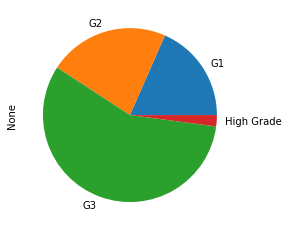

In [168]:
unified_meta.groupby("GRADE").size().plot.pie()
#Pela análise do gráfico circular, é possível verificar que a maior parte dos pacientes apresenta tumor com grau 3, 
#seguido de grau 2, de seguida grau 1 e por último poucos pacientes apresentam grau elevado.

In [169]:
unified_meta.groupby("TUMOR_TYPE").size()  
#Dos pacientes analisados, em 397 pacientes o tumor é Endometrioid Endometrial Adenocarcinoma, em 21 pacientes o tumor é
#Mixed Serous and Endometrioid Carcinoma e em 109 paciente o tumor é Serous Endometrial Adenocarcinoma.
#(397 + 21 + 109 = 527 pacientes)

TUMOR_TYPE
Endometrioid Endometrial Adenocarcinoma    397
Mixed Serous and Endometrioid Carcinoma     21
Serous Endometrial Adenocarcinoma          109
dtype: int64

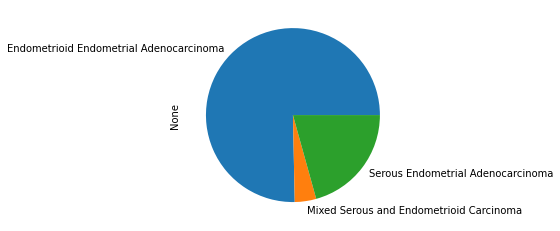

In [170]:
unified_meta.groupby("TUMOR_TYPE").size().plot.pie()
#Pela análise do gráfico circular, é possível verificar que a maior parte dos pacientes apresenta tumor do tipo Endometrioid 
#Endometrial Adenocarcinoma, seguido de Serous Endometrial Adenocarcinoma e uma minoria dos pacientes apresenta cancro do tipo
#Mixed Serous and Endometrioid Carcinoma.

In [171]:
unified_meta.groupby("TISSUE_SOURCE_SITE").size()  
#Dos pacientes analisados, verifica-se que existem diferentes locais de origem do tecido, desde 2E a SL.

TISSUE_SOURCE_SITE
2E     1
4E     1
5B     1
5S     1
A5    45
AJ    36
AP    43
AW     1
AX    61
B5    58
BG    39
BK    12
BS    25
D1    76
DF     8
DI     9
E6     6
EC     3
EO    22
EY    38
FI    16
H5     1
JU     1
K6     1
KP     5
PG     7
QF     2
QS     4
SJ     2
SL     2
dtype: int64

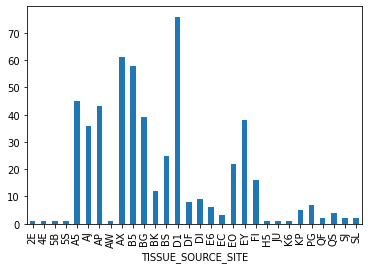

In [172]:
unified_meta.groupby("TISSUE_SOURCE_SITE").size().plot.bar()
#Pela análise do gráfico de barras, é possível verificar que na maior parte dos pacientes, o local de origem do tecido
#foram células D1, seguidas de AX e B5.

In [173]:
unified_meta.groupby("OS_MONTHS").size()  
#Dos pacientes analisados,em vários a sobrevivência é de apenas 1 mês, existindo aguns cuja sobrevivência é 2 meses e 
#muitos outros cuja sobrevivência não é visível nesta lista.

OS_MONTHS
0               1
0.0657527041    1
0.1315054082    1
0.1972581122    2
0.2301344643    2
               ..
96.294835125    1
96.492093237    1
96.68935135     1
97.412631094    1
97.708518263    1
Length: 473, dtype: int64

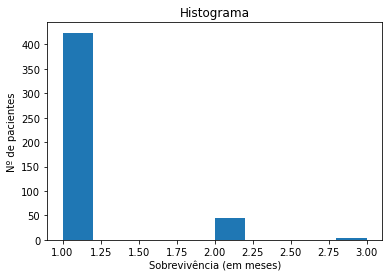

In [174]:
overall_sur = unified_meta.groupby("OS_MONTHS").size()
plt.hist(overall_sur)
plt.xlabel('Sobrevivência (em meses)')
plt.ylabel('Nº de pacientes')
plt.title(r'Histograma')
plt.show()
#Pela análise do histograma, é possível verificar que na maior parte dos pacientes a sobrevivência é de apenas 1 mês, 
#havendo poucos que sobrevivem 2 meses e uma minoria que sobrevive perto de 3 meses.

In [175]:
unified_meta.groupby("RADIATION_THERAPY").size()  
#Dos pacientes analisados, 283 não realizaram radioterapia e 218 realizaram radioterapia. 

RADIATION_THERAPY
No     283
Yes    218
dtype: int64

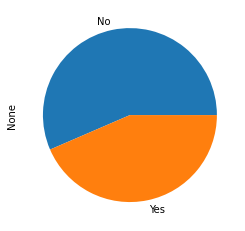

In [176]:
unified_meta.groupby("RADIATION_THERAPY").size().plot.pie()
#Pela análise do gráfico circular, é possível verificar que a maior parte dos pacientes não realizou radioterapia.

# Secção 2

### Análise estatística univariada e filtros

Para fazer o preprocessamento dos dados, é necessário eliminar genes que tenham valores com "NaN". Desta forma, é possível obter dados com média 0 e desvio padrão 1 (condição necessária para se efetuar por exemplo o PCA, o cálulo da média da variância, testes de hipóteses, etc).
Este método de remoção dos "missing values" permite minimizar a perda de informação, uma vez que apenas foram eliminados genes que tinham valores de "NaN" e que em nada agregavam informações ao dataset.

In [177]:
data_final.dropna(axis = 1, inplace = True)
print(data_final.isnull().sum())
#Podemos ver que o código foi em executado, pois não são visíveis missing values.

Hugo_Symbol
A1BG      0
A1CF      0
A2BP1     0
A2LD1     0
A2M       0
         ..
ZYG11A    0
ZYG11B    0
ZYX       0
ZZEF1     0
ZZZ3      0
Length: 17494, dtype: int64


In [178]:
data_final.isnull().sum().sum() #Confirmar que não existem valores nulos
#Como a dupla soma dá 0, então não há valores nulos.

0

In [179]:
#análise univariada considera cada gene individualmente e aplica-se a todos os genes.
input_data = data_final.values  # apenas a matriz de valores numpy
print(input_data.shape)
# O shape confirma que existem na mesma 527 amostras de pacientes (como se tinha anteriormente). Contudo, verifica-se que o 
#número de genes passou de 20502 para 17494, pois foram eliminados os genes que tinham "missing values".

(527, 17494)


In [180]:
variances = input_data.var(axis = 0) # calcular a variância de cada gene
#como os genes estão nas colunas, põe-se axis = 0
print(variances.shape) #Confirma-se que existem 17494 variâncias, uma por cada gene
medvar = variances.mean()
medvar
#a média das variâncias é muito alta, o que indica que cada gene varia muito. 

(17494,)


7415277.13391749

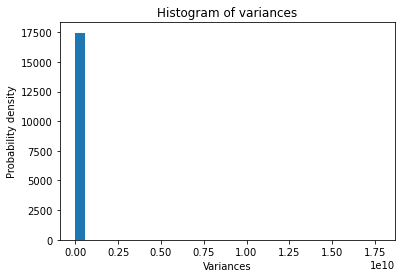

In [181]:
#Outra forma de ver os valores das variâncias de cada gene
plt.hist(variances, bins = 30) 
plt.xlabel('Variances')
plt.ylabel('Probability density')
plt.title(r'Histogram of variances')
plt.show()
#Pela análise do histograma, verifica-se que a maior parte dos genes varia muito. Confirma-se que a maior parte dos genes
#apresenta uma variância elevada, que ronda a média das variâncias (em torno de 7E06).

In [182]:
#Filtros de variabilidade (flat pattern)
#VarianceThreshold filtra colunas ou variáveis que variam menos que Th. 
#Das 17494 colunas (ou genes), apenas 457 genes variam mais que o Th. 
sel = VarianceThreshold(threshold= medvar*2) #apenas foram selecionados genes cuja média é maior 2x que a média da variância
input_filt = sel.fit_transform(input_data)
input_filt.shape

(527, 457)

Para cada uma das variáveis de metadados que foram analisadas na Secção 1, serão identificados os genes mais diferencialmente
expressos para cada uma dessas variáveis. 

**Variável "GRADE"**

In [183]:
#Neste caso, serão identificados os genes mais diferencialmente expressos de acordo com o grau do tumor. 

data_final.dropna(inplace = True)


# fclassif: o teste feito pode ser ANOVA ou t-test
# Neste caso, o teste foi a ANOVA pois a variável "GRADE" tem mais do que duas classes.
#A linha abaixo seleciona genes com menor p-value (os 10% com menor valor) .
selector = SelectPercentile(f_classif, percentile=10) #percentil 10%

#[:,2]TUMOR_TYPE, [:,3]GRADE, [:,7]TISSUE_SOURCE_SITE
# Nenhuma das classes apresenta missing values.
#O grau pode ser G1, G2, G3 ou "High Grade". 
#Assim, os genes são divididos em 4 grupos. Nestes grupos, vamos ver quais genes variam mais que 10%.
output_grade = unified_meta.values[:,4]


selector.fit_transform(data_final, output_grade)
genes_de = np.where(selector.pvalues_ <0.01) 
#quanto menor for o pvalue, mais estatisticamente significativo é a conclusão que os genes são
#diferencialmente expressos. Se dimnuirmos o pvalue verificamos que a lista de
# de genes que aparecem ao correr a script é cada vez menor e corresponde ao grupo de genes que variam mais para uma 
#determinada variável (os mais diferencialmente expressos). 

print(data_final.columns[genes_de])
#Em baixo temos uma lista em que apenas são visíveis alguns dos genes diferencialemente expressos para o grau do tumor.
#No total são 7099 genes.

Index(['A1BG', 'A4GALT', 'AACS', 'AADAT', 'AAGAB', 'AAK1', 'AAMP', 'AARS',
       'AARS2', 'AASS',
       ...
       'ZSWIM4', 'ZSWIM5', 'ZSWIM6', 'ZUFSP', 'ZW10', 'ZWINT', 'ZXDC',
       'ZYG11A', 'ZYG11B', 'ZZZ3'],
      dtype='object', name='Hugo_Symbol', length=7099)


In [184]:
#Para determinar qual é o gene mais diferencialmente expresso de todos.
genes_de = np.where(selector.pvalues_ <0.000000000000000000000000000000001) 
print(data_final.columns[genes_de])

Index(['AURKA'], dtype='object', name='Hugo_Symbol')


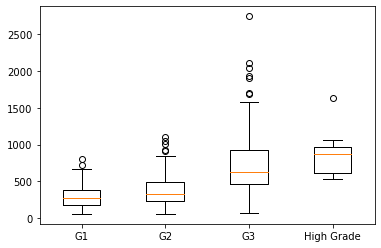

In [185]:
# Para o gene "AURKA", construiu-se o diagrama de quartis e observaram-se os resultados para cada um dos graus de tumor.
data_gene = data_final.loc[:,'AURKA'] 
data_G1 = data_gene[unified_meta["GRADE"]=="G1"]
data_G2 = data_gene[unified_meta["GRADE"]=="G2"]
data_G3 = data_gene[unified_meta["GRADE"]=="G3"]
data_highGrade = data_gene[unified_meta["GRADE"]=="High Grade"]
both = [data_G1, data_G2, data_G3, data_highGrade]
plt.boxplot(both)
plt.xticks([1,2,3,4], ["G1", "G2", "G3", "High Grade"])
plt.show()

#Em G1 existem 2 outliers e os dados parecem ser simétricos.
#Em G2 existem vários outliers e os dados estão enviesados para o lado do mínimo, sendo a mediana próxima do mínimo.
#Em G3 existem bastantes outliers, verifica-se que os dados são enviesados para o lado do mínimo.
#Em "High Grade", existe 1 outlier e os dados são enviesados para o lado do máximo. Os dados apresentam baixa amplitude.

**Variável "TUMOR_TYPE"**

In [186]:
# O tipo de tumor pode ser Endometrioid Endometrial Adenocarcinoma,Mixed 
#Serous and Endometrioid Carcinoma e Serous Endometrial Adenocarcinoma.
#Assim, os genes são divididos em 3 grupos. Nestes grupos, vamos ver quais genes variam mais que 10%.
output_tumor = unified_meta.values[:,3]


selector.fit_transform(data_final, output_tumor)
genes_de3 = np.where(selector.pvalues_ <0.01) 
#quanto menor for o pvalue, mais estatisticamente significativo é a conclusão que os genes são
#diferencialmente expressos. Se dimnuirmos o pvalue verificamos que a lista de
# de genes que aparecem ao correr a script é cada vez menor e corresponde ao grupo de genes que variam mais para uma 
#determinada variável (os mais diferencialmente expressos). 

print(data_final.columns[genes_de3])
#Em baixo temos uma lista em que apenas são visíveis alguns dos genes diferencialemente expressos para o tipo do tumor.
#No total são 7813 genes.

Index(['A1BG', 'A2BP1', 'A4GALT', 'AACS', 'AADAT', 'AAK1', 'AAMP', 'AANAT',
       'AARS2', 'AASS',
       ...
       'ZSWIM3', 'ZSWIM4', 'ZSWIM5', 'ZSWIM6', 'ZSWIM7', 'ZXDC', 'ZYG11A',
       'ZYG11B', 'ZZEF1', 'ZZZ3'],
      dtype='object', name='Hugo_Symbol', length=7813)


In [187]:
#Para determinar qual é o gene mais diferencialmente expresso de todos.
genes_de3 = np.where(selector.pvalues_ <0.0000000000000000000000000000000000000000000000001) 
print(data_final.columns[genes_de3])

Index(['L1CAM'], dtype='object', name='Hugo_Symbol')


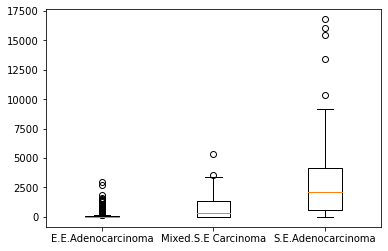

In [188]:
data_gene = data_final.loc[:,'L1CAM']
data_Endo = data_gene[unified_meta["TUMOR_TYPE"]=="Endometrioid Endometrial Adenocarcinoma"]
data_Mixed = data_gene[unified_meta["TUMOR_TYPE"]=="Mixed Serous and Endometrioid Carcinoma"]
data_Serous = data_gene[unified_meta["TUMOR_TYPE"]=="Serous Endometrial Adenocarcinoma"]

both = [data_Endo,data_Mixed,data_Serous]
plt.boxplot(both)
plt.xticks([1,2,3], ["E.E.Adenocarcinoma", "Mixed.S.E Carcinoma", "S.E.Adenocarcinoma"])
plt.show()

#Em "Endometrioid Endometrial Adenocarcinoma" existem vários outliers e os dados parecem estar muito próximos das mediana.
#Em "Mixed Serous and Endometrioid Carcinoma" existem dois outliers e os dados estão enviesados para o lado do mínimo, 
#sendo a mediana próxima do mínimo.
#Em "Serous Endometrial Adenocarcinoma", existem 5 outliers e os estão ligeiramente enviesados para o lado do mínimo.

**Variável "TISSUE_SOURCE_SITE"**

In [189]:
# Os pacientes possuem diferentes locais de origem do tecido (30 locais).
# Assim, os genes são divididos em 30 grupos. Nestes grupos, vamos ver quais genes variam mais que 10%.
output_tissue = unified_meta.values[:,7]


selector.fit_transform(data_final, output_tissue)
genes_de7 = np.where(selector.pvalues_ <0.01) 
#quanto menor for o pvalue, mais estatisticamente significativo é a conclusão que os genes são
#diferencialmente expressos. Se dimnuirmos o pvalue verificamos que a lista de
# de genes que aparecem ao correr a script é cada vez menor e corresponde ao grupo de genes que variam mais para uma 
#determinada variável (os mais diferencialmente expressos). 

print(data_final.columns[genes_de7])
#Em baixo temos uma lista em que apenas são visíveis alguns dos genes diferencialemente expressos para o o local de origem 
#do tecido. No total são 6753 genes.

Index(['AAAS', 'AACS', 'AAGAB', 'AAMP', 'AANAT', 'AARS', 'AARSD1', 'AASDH',
       'AATF', 'ABCA1',
       ...
       'ZSWIM4', 'ZSWIM6', 'ZSWIM7', 'ZWILCH', 'ZWINT', 'ZXDA', 'ZXDB', 'ZXDC',
       'ZYX', 'ZZEF1'],
      dtype='object', name='Hugo_Symbol', length=6753)


In [190]:
#Para determinar qual é o gene mais diferencialmente expresso de todos.
genes_de7 = np.where(selector.pvalues_ <0.00000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000001) 
print(data_final.columns[genes_de7])

Index(['ANKFN1', 'KLK3'], dtype='object', name='Hugo_Symbol')


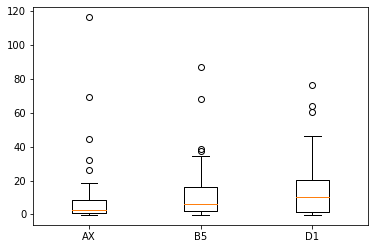

In [191]:
#De entre os dois genes mais diferencialmente expressos, escolheu-se o ANKFN1.
#Como na variável "TISSUE_SOURCE_SITE" existem 30 classes, apenas elegemos as 3 classes (as que apresentavam um maior número de 
#pacientes), para podermos representar o diagrama de quartis de uma forma mais percetível.
data_gene = data_final.loc[:,'ANKFN1']
data_AX = data_gene[unified_meta["TISSUE_SOURCE_SITE"]=="AX"]
data_B5 = data_gene[unified_meta["TISSUE_SOURCE_SITE"]=="B5"]
data_D1 = data_gene[unified_meta["TISSUE_SOURCE_SITE"]=="D1"]

both = [data_AX,data_B5,data_D1]
plt.boxplot(both)
plt.xticks([1,2,3], ["AX", "B5", "D1"])
plt.show()

#Em "AX" existem 5 outliers e os dados parecem estar muito próximos do valor mínimo, estando por isso enviesados para o lado 
#do mínimo.
#Em "B5" existem vários outliers e os dados estão enviesados para o lado do mínimo, sendo a mediana próxima do mínimo.
#Em "D1", existem 3 outliers e os dados parecem ser simétricos.

**Variável "OS_MONTHS"**

In [192]:
#Analisa a sobrevivência dos pacientes (em meses) desde o diagnóstico inicial da doença.
# Assim, os genes são divididos em vários grupos (que neste caso são meses). Nestes grupos, vamos ver quais genes variam 
#mais que 10%.
output_os_months = unified_meta.values[:,80]

output_os_months=output_os_months.astype(np.float) # Forçar o array a ser array de np.floats.

np.nan_to_num(output_os_months, copy=False) #Substituir NaN por 0.0.

selector.fit_transform(data_final, output_os_months)


genes_de80= np.where(selector.pvalues_ <0.01) 
#quanto menor for o pvalue, mais estatisticamente significativo é a conclusão que os genes são
#diferencialmente expressos. Se dimnuirmos o pvalue verificamos que a lista de
# de genes que aparecem ao correr a script é cada vez menor e corresponde ao grupo de genes que variam mais para uma 
#determinada variável (os mais diferencialmente expressos). 

print(data_final.columns[genes_de80])
#Em baixo temos uma lista em que apenas são visíveis alguns dos genes diferencialemente expressos para a sobrevivência 
#dos pacientes (em meses) desde o diagnóstico inicial da doença. No total são 2702 genes.

Index(['A1CF', 'A4GALT', 'AACSL', 'AATF', 'AATK', 'ABCA9', 'ABCB1', 'ABCB5',
       'ABCC2', 'ABCC6',
       ...
       'ZNF878', 'ZNHIT3', 'ZP1', 'ZRSR2', 'ZSCAN1', 'ZSCAN18', 'ZSCAN29',
       'ZSCAN5B', 'ZSWIM4', 'ZSWIM5'],
      dtype='object', name='Hugo_Symbol', length=2702)


In [193]:
#Para determinar qual é o gene mais diferencialmente expresso de todos.
genes_de80= np.where(selector.pvalues_ <0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000001) 
print(data_final.columns[genes_de80])

Index(['CLDN18'], dtype='object', name='Hugo_Symbol')


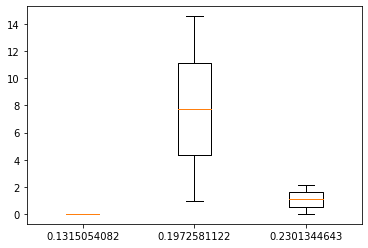

In [194]:
data_gene = data_final.loc[:,'CLDN18']
data_AX = data_gene[unified_meta["OS_MONTHS"]=="0.1315054082"]
data_B5 = data_gene[unified_meta["OS_MONTHS"]=="0.1972581122"]
data_D1 = data_gene[unified_meta["OS_MONTHS"]=="0.2301344643"]

both = [data_AX,data_B5,data_D1]
plt.boxplot(both)
plt.xticks([1,2,3], ["0.1315054082", "0.1972581122", "0.2301344643"])
plt.show()

#Em "0,13..." meses verifica-se que os dados não apresentam amplitude, apenas um único valor que corresponde a todos os quartis.
#Não existem outliers. 
#Em "0,19..." meses verifica-se que os dados são perfeitamente simétricos.
#Em "0,23..." meses, os dados são igualmente simétricos, apresentando menores amplitudes do que no diagrama de quatis anterior. 

**Variável "RADIATION_THERAPY"**

In [195]:
# Os pacientes podem ou não ter realizado radioterapia.
# Assim, os genes são divididos em 2 grupos. Nestes grupos, vamos ver quais genes variam mais que 10%.

output_radiation = unified_meta.values[:,-12]

genes_de_12 = np.where(selector.pvalues_ <0.01) 
#quanto menor for o pvalue, mais estatisticamente significativo é a conclusão que os genes são
#diferencialmente expressos. Se dimnuirmos o pvalue verificamos que a lista de
# de genes que aparecem ao correr a script é cada vez menor e corresponde ao grupo de genes que variam mais para uma 
#determinada variável (os mais diferencialmente expressos). 

print(data_final.columns[genes_de_12])
#Em baixo temos uma lista em que apenas são visíveis alguns dos genes diferencialemente expressos para a realização ou não
#realização de radioterapia. No total são 2702 genes.

Index(['A1CF', 'A4GALT', 'AACSL', 'AATF', 'AATK', 'ABCA9', 'ABCB1', 'ABCB5',
       'ABCC2', 'ABCC6',
       ...
       'ZNF878', 'ZNHIT3', 'ZP1', 'ZRSR2', 'ZSCAN1', 'ZSCAN18', 'ZSCAN29',
       'ZSCAN5B', 'ZSWIM4', 'ZSWIM5'],
      dtype='object', name='Hugo_Symbol', length=2702)


In [196]:
#Para determinar qual é o gene mais diferencialmente expresso de todos.
genes_de_12= np.where(selector.pvalues_ <0.0000000000000000000000000000000000000000000000000000000000000000000000000000000000001) 
print(data_final.columns[genes_de_12])

Index(['CLDN18'], dtype='object', name='Hugo_Symbol')


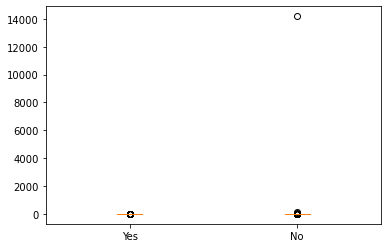

In [197]:
data_gene = data_final.loc[:,'CLDN18']
data_Yes= data_gene[unified_meta["RADIATION_THERAPY"]=="Yes"]
data_No = data_gene[unified_meta["RADIATION_THERAPY"]=="No"]

both = [data_Yes,data_No]
plt.boxplot(both)
plt.xticks([1,2], ["Yes", "No"])
plt.show()

#Em "Yes" existe 1 outlier.
#Em "No" existem vários outliers. 
#Em ambos os diagramas de quartis as amplitudes são muito baixas, de tal modo que não se conseguem distinguir os quartis.

### Análise multivariada não supervisionada

A análise multivariada supervisionada aplica técnicas a muitas variáveis ao mesmo tempo (PCA e clustering). Em primeiro lugar fazemos a standardização dos dados para poderem ser utilizados no PCA, clustering e machine learning. Isto é importante porque temos valores com gamas muito distintas.

In [198]:
input_data=data_final.values
output_data=unified_meta.values[:,0]
#Para se proceder ao PCA é necessário obter média 0 e desvio padrão 1. Como se pode visulizar, esse foi aproximadamente o 
#resultado obtido.
input_sc = preprocessing.scale(input_data)
print("Media: ", input_sc.mean())
print("Desvio padrao: ", input_sc.std())


Media:  -1.0419986540765242e-17
Desvio padrao:  0.9999999999999993


In [199]:
#Existem 17494 genes, mas desses genes apenas foram escolhidos 50 para diminuir o número de variáveis do dataset, a partir do PCA.
pca = PCA(n_components=50)
X_r = pca.fit(input_sc).transform(input_sc) #executa o pca, cria dados transformados

#Se se somarem todas as contribuições, verifica-se que com apenas com genes, é possível explicar cerca de 58% da variabilidade
#dos nossos dados, o que é bastante, tendo em conta que o nº total de genes é muito superior.
print('Var. explicada: %s'% str(pca.explained_variance_ratio_))
pca.explained_variance_ratio_.sum()

Var. explicada: [0.0942245  0.05282587 0.04237771 0.0375693  0.02940511 0.02515204
 0.02146966 0.01809149 0.01539997 0.01407879 0.01253557 0.01172463
 0.01069087 0.00999687 0.00931702 0.0086132  0.00759786 0.00730433
 0.00703997 0.00674946 0.0065674  0.00643951 0.00590108 0.00582262
 0.00571012 0.00525207 0.00519433 0.00510234 0.00495095 0.00478066
 0.00470237 0.00454052 0.00450837 0.00443324 0.00429954 0.00427539
 0.00417734 0.00402761 0.0039183  0.00388094 0.00383558 0.00371568
 0.00368122 0.00365943 0.00356036 0.00349895 0.00343665 0.00339454
 0.00333425 0.00326118]


0.5760267733248386

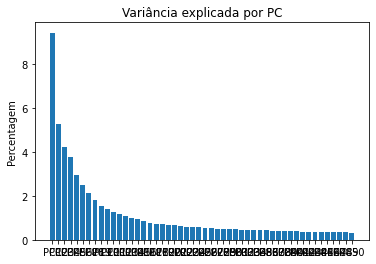

In [200]:
n = 50
plt.bar(range(n), pca.explained_variance_ratio_*100)
plt.xticks(range(n), ['PC'+str(i) for i in range(1,n+1)])
plt.title("Variância explicada por PC")
plt.ylabel("Percentagem")
plt.show()

**Variável "GRADE"**

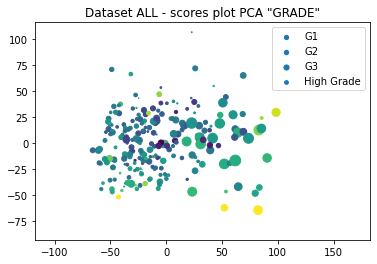

In [243]:
output_grade = unified_meta.values[:,4]  

plt.figure()
for c, name in zip(["r", "b", "g", "y"], ["G1", "G2", "G3", "High Grade"]):
    plt.scatter(X_r[output_grade == name, 0], X_r[output_grade == name, 1], X_r[output_grade == name, 2], X_r[output_grade == name, 3], label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA "GRADE"')
plt.show()

#A legenda do gráfico não está correta. As bolas  amarelas são o High Grade (HG), as bolas azuis mais escuras são G1 e as bolas
#azuis escuras (tom intermédio) são G2, as bolas azuis claras são G3.
#Na figura cada ponto é um paciente. 
#Com estes componentes parece não haver uma separação clara entre os dados, apesar de ser visível uma proximidade entre G1 e G2 
#e entre G3 e HG.

In [202]:
#Clustering hierarquico

#Fazem-se clusters do grupo de pacientes para agrupar os pacientes e vemos se o agrupamento está relacionado com o grau do tumor.
hclust = AgglomerativeClustering(n_clusters=3, affinity="euclidean",
                                 linkage="ward") 
hclust.fit(input_sc)

output_grade = unified_meta.values[:,4]  
res_hc = hclust.labels_
pd.crosstab(output_grade, res_hc)

#Pela análise dos resultados, parece que o 3º cluster separa os tumores de G1 e G2 dos tumores de G3 e HG, como anteriormente
#se havia visto, uma vez que a proporção de pacientes com G3 e HG neste cluster é muito superior do que em G1 e G2.
#Nos outros 2 clusters, parece que a proporção de graus de tumor é aproximadamente a mesma, com a exceção do "High Grade".

col_0,0,1,2
row_0,,,
G1,13,84,0
G2,17,97,4
G3,73,124,104
High Grade,4,1,6


In [203]:
# k-means

kmeans_est = KMeans(init='random', n_clusters=3, n_init = 100) #3 clusters

res_kmeans = kmeans_est.fit(input_sc).predict(input_sc)

pd.crosstab(output_grade, res_kmeans) 

#O 2º cluster parece estabelecer uma separação interessante entre G1, G2 e G3 e HG. 
#Nos outros 2 clusters, parece que a proporção de graus de tumor é aproximadamente a mesma, com a exceção do "High Grade".
#Os resultados pca, k means e clustering mostraram que o grau dos tumores parece explicar as variações na expressão genética.

col_0,0,1,2
row_0,,,
G1,77,18,2
G2,83,21,14
G3,77,64,160
High Grade,2,3,6


**Variável "TUMOR_TYPE"**

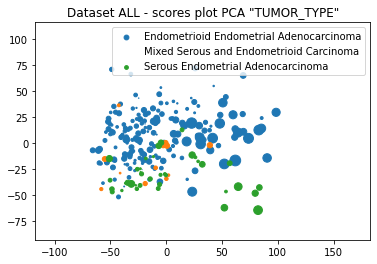

In [244]:
output_tumor = unified_meta.values[:,3]
plt.figure()
for c, name in zip("rgb", ["Endometrioid Endometrial Adenocarcinoma", "Mixed Serous and Endometrioid Carcinoma", "Serous Endometrial Adenocarcinoma"]):
#for c, name in zip("rgb", ["Uterine Endometrioid Carcinoma", "Endometrioid Endometrial Adenocarcinoma", "Serous Endometrial Adenocarcinoma"]):
    plt.scatter(X_r[output_tumor == name, 0], X_r[output_tumor == name, 1], X_r[output_tumor == name, 2], label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA "TUMOR_TYPE"')
plt.show()
#Na figura cada ponto é um paciente. 
#A legenda do gráfico está incompleta. Além da legenda que se pode ver no gráfico, é de realçar que a laranja está representado
#"Mixed Serous and Endometrial Carcinoma". 
#Com estes componentes parece não haver uma separação clara entre os dados, apesar de ser visível alguma separação entre 
#as classes "Endometroid Endometrial Adenocarcinoma" e "Serous Endometrial Adenocarcinoma".

In [205]:
#Clustering hierarquico

#Fazem-se clusters do grupo de pacientes para agrupar os pacientes e vemos se o agrupamento está relacionado com o tipo de tumor.
hclust = AgglomerativeClustering(n_clusters=3, affinity="euclidean",
                                 linkage="ward") 
hclust.fit(input_sc)

output_grade = unified_meta.values[:,3]  
res_hc = hclust.labels_
pd.crosstab(output_grade, res_hc)

#Pela análise dos resultados, parece que o 2º cluster separa os tumores do tipo "Endometrioid Endometrial Adenocarcinoma" dos
#restantes tipos de tumor, uma vez que a proporção de pacientes com o tumor indicado é bastante superior quando comparada com a
#população dos restantes tipos de tumor.
#Nos outros 2 clusters, não parece haver nenhuma separação interessante.

col_0,0,1,2
row_0,,,
Endometrioid Endometrial Adenocarcinoma,70,295,32
Mixed Serous and Endometrioid Carcinoma,7,8,6
Serous Endometrial Adenocarcinoma,30,3,76


In [206]:
# k-means

kmeans_est = KMeans(init='random', n_clusters=3, n_init = 100) #3 clusters

res_kmeans = kmeans_est.fit(input_sc).predict(input_sc)

pd.crosstab(output_grade, res_kmeans) 

#Pela análise dos resultados, parece que o 1º cluster separa os tumores do tipo "Endometrioid Endometrial Adenocarcinoma" dos
#restantes tipos de tumor, uma vez que a proporção de pacientes com o tumor indicado é bastante superior quando comparada com a
#população dos restantes tipos de tumor.
#Nos outros 2 clusters, não parece haver nenhuma separação interessante.
#Os resultados pca, k means e clustering mostraram que o tipo dos tumores parece explicar as variações na expressão genética.

col_0,0,1,2
row_0,,,
Endometrioid Endometrial Adenocarcinoma,74,230,93
Mixed Serous and Endometrioid Carcinoma,4,4,13
Serous Endometrial Adenocarcinoma,28,5,76


**Variável "TISSUE_SOURCE_SITE"**

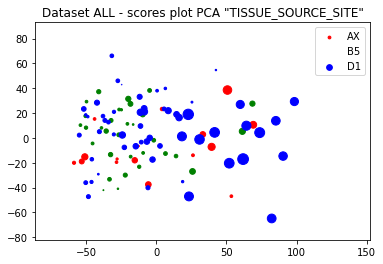

In [245]:
plt.figure()
for c, name in zip("rgb", ["AX", "B5", "D1"]):
    plt.scatter(X_r[output_tissue == name, 0], X_r[output_tissue == name, 1], X_r[output_tissue == name, 2],c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA "TISSUE_SOURCE_SITE"')
plt.show()
#No gráfico estão as 3 classes com maior população da variável em causa.
#Na figura cada ponto é um paciente.
#A legenda do gráfico está incompleta. Além da legenda que se pode ver no gráfico, é de realçar que a verde está representado
#"B5".
#Com estes componentes parece não haver uma separação clara entre os dados, sendo visível as 3 classes espalhadas por todo o 
#gráfico.

In [208]:
#Clustering hierarquico

#Fazem-se clusters do grupo de pacientes para agrupar os pacientes e vemos se o agrupamento está relacionado com o grau do tumor.
hclust = AgglomerativeClustering(n_clusters=3, affinity="euclidean",
                                 linkage="ward") 
hclust.fit(input_sc)

output_grade = unified_meta.values[:,7]  
res_hc = hclust.labels_
pd.crosstab(output_grade, res_hc)

#Pela análise dos resultados, parece não haver nenhuma separação interessante entre as classes, uma vez que nos 3 cluster's, as
#proporções dos dados parecem as mesmas.

col_0,0,1,2
row_0,,,
2E,1,0,0
4E,0,1,0
5B,0,0,1
5S,0,1,0
A5,10,30,5
AJ,11,17,8
AP,5,28,10
AW,0,0,1
AX,12,30,19


In [209]:
# k-means

kmeans_est = KMeans(init='random', n_clusters=3, n_init = 100) #3 clusters

res_kmeans = kmeans_est.fit(input_sc).predict(input_sc)

pd.crosstab(output_grade, res_kmeans) 

#Pela análise dos resultados, parece não haver nenhuma separação interessante entre as classes, uma vez que nos 3 cluster's, as
#proporções dos dados parecem as mesmas.
#Os resultados pca, k means e clustering mostraram que o local de origem do tecido não parece explicar as variações na expressão
#genética.

col_0,0,1,2
row_0,,,
2E,0,0,1
4E,1,0,0
5B,0,0,1
5S,0,1,0
A5,24,10,11
AJ,15,4,17
AP,22,13,8
AW,0,0,1
AX,25,12,24


**Variáveis "OS_MONTHS"**

<ipython-input-210-5bc3d92015fc>:3: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  plt.scatter(X_r[output_os_months == name, 0],X_r[output_os_months == name, 1], X_r[output_os_months == name, 2],c=c, label=name)


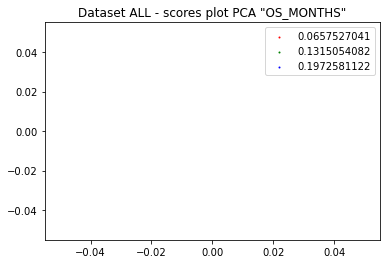

In [210]:
plt.figure()
for c, name in zip("rgb", ["0.0657527041","0.1315054082","0.1972581122"]):
    plt.scatter(X_r[output_os_months == name, 0],X_r[output_os_months == name, 1], X_r[output_os_months == name, 2],c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA "OS_MONTHS"')
plt.show()
#No gráfico não aparece nada devido à escolha das classes. 
#No entanto, não encontramos um critério para uma escolha mais apropriada.

In [211]:
#Clustering hierarquico

#Fazem-se clusters do grupo de pacientes para agrupar os pacientes e vemos se o agrupamento está relacionado com a radioterapia.
hclust = AgglomerativeClustering(n_clusters=3, affinity="euclidean",
                                 linkage="ward") 
hclust.fit(input_sc)

output_grade = unified_meta.values[:,-7]  
res_hc = hclust.labels_
pd.crosstab(output_grade, res_hc)

#Pela análise dos resultados, parece não haver nenhuma separação interessante entre as classes, uma vez que nos 3 cluster's, as
#proporções dos dados variam, mas sempre entre 1 e 0, impedindo que sejam tiradas conclusões.

col_0,0,1,2
row_0,,,
0,0,0,1
0.0657527041,1,0,0
0.1315054082,0,1,0
0.1972581122,1,0,1
0.2301344643,1,0,1
...,...,...,...
96.294835125,0,1,0
96.492093237,0,1,0
96.68935135,0,0,1


In [212]:
# k-means

kmeans_est = KMeans(init='random', n_clusters=3, n_init = 100) #3 clusters

res_kmeans = kmeans_est.fit(input_sc).predict(input_sc)

pd.crosstab(output_grade, res_kmeans) 

#Pela análise dos resultados, parece não haver nenhuma separação interessante entre as classes, uma vez que nos 3 cluster's, as
#proporções dos dados variam, mas sempre entre 1 e 0, impedindo que sejam tiradas conclusões.
#Os resultados pca, k means e clustering mostraram que a sobrevivência (em meses) do paciente após o diagnóstico inicial da
#doença não parece explicar as variações na expressão genética.

col_0,0,1,2
row_0,,,
0,0,1,0
0.0657527041,0,0,1
0.1315054082,1,0,0
0.1972581122,1,1,0
0.2301344643,0,1,1
...,...,...,...
96.294835125,0,1,0
96.492093237,1,0,0
96.68935135,0,1,0


**Variáveis "RADIATION_THERAPY"**

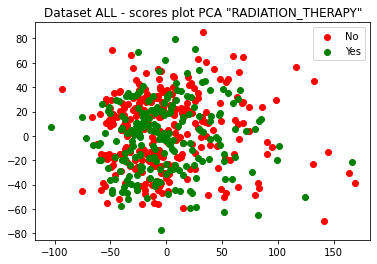

In [213]:
plt.figure()
for c, name in zip("rgb", ["No", "Yes"]):
    plt.scatter(X_r[output_radiation == name, 0],X_r[output_radiation == name, 1], c=c, label=name)
plt.legend()
plt.title('Dataset ALL - scores plot PCA "RADIATION_THERAPY"')
plt.show()
#Na figura cada ponto é um paciente.
#Com estes componentes parece não haver uma separação clara entre os dados.

In [214]:
#Clustering hierarquico

#Fazem-se clusters do grupo de pacientes para agrupar os pacientes e vemos se o agrupamento está relacionado com a radioterapia.
hclust = AgglomerativeClustering(n_clusters=3, affinity="euclidean",
                                 linkage="ward") 
hclust.fit(input_sc)

output_grade = unified_meta.values[:,-12]  
res_hc = hclust.labels_
pd.crosstab(output_grade, res_hc)

# Pela análise dos resultados, parece que em todos os clusters a proporção de pacientes que não realizou radioterapia
#é maior do que a população que realizou radioterapia, à exceção do primeiro cluster, em que são praticamente iguais.
#Contudo, é no 2º cluster em que parece haver uma distinção mais clara entre as duas classes.

col_0,0,1,2
row_0,,,
No,47,180,56
Yes,50,120,48


In [215]:
# k-means

kmeans_est = KMeans(init='random', n_clusters=3, n_init = 100) #3 clusters

res_kmeans = kmeans_est.fit(input_sc).predict(input_sc)

pd.crosstab(output_grade, res_kmeans) 

# Em todos os clusters, a proporção de pacientes que não realizou radioterapia é maior do que a população de pacientes que 
#realizou radioterapia. 
#Contudo, é no 1º cluster em que parece haver uma distinção mais clara entre as duas classes.
#Os resultados pca, k means e clustering mostraram que a realização ou não realização de radioterapia não parece explicar
#de forma suficientemente clara as variações na expressão genética.

col_0,0,1,2
row_0,,,
No,57,140,86
Yes,40,114,64


# Secção 3

Vamos considerar como variável de output, a variável "GRADE". Nos atributos, vamos considerar apenas os genes considerados com diferencialmente expressos acima.

In [216]:
#Prever a variável "GRADE" a partir dos dados.
#Usaram-se apenas os genes diferencialmente expressos (7099)

output_grade = unified_meta.values[:,4]
selector.fit_transform(data_final, output_grade)
genes_de = np.where(selector.pvalues_ <0.01) 
input_sc_filt2 = input_sc[:,genes_de[0]]
print(input_sc_filt2.shape) #dados standardizados, porque funciona melhor na aprendizagem máquina.
#Temos as 527 amostras e 7099 genes diferencialmente expressos.

(527, 7099)


In [217]:
#Crriar dados para treino e para teste dos modelos de machine learning.
#Prever qual o grau do tumor que o paciente apresenta.
indices = np.random.permutation(len(input_sc_filt2)) #permutation para não considerar a ordem dos dados no dataset
indices
numtr = int(2/3 * input_sc_filt2.shape[0]) #2/3 dos dados para treino, 1/3 para teste
train_in = input_sc_filt2[indices[:-numtr]]
train_out = output_grade[indices[:-numtr]]
test_in  = input_sc_filt2[indices[-numtr:]]
test_out = output_grade[indices[-numtr:]]

print(train_in.shape) #para confirmar se deu bem
print(train_out.shape) #176 = 1/3 * 527

(176, 7099)
(176,)


Modelo de k-vizinhos mais próximos

In [218]:
knn = KNeighborsClassifier()
knn.fit(train_in, train_out)
preds_knn = knn.predict(test_in)
print("Valores previstos: ", preds_knn)
print("Valores reais: " , test_out)
print("Percentagem acertos: ", (preds_knn == test_out).sum()/len(preds_knn) )
#Verficamos que nos valores previstos, nunca são previstas os tumores de "High Grade", uma vez que esta classe é a classe de 
#menor número.
#A percentagem de acertos é cerca de 55%, o que também não é muito elevado.

Valores previstos:  ['G2' 'G1' 'G3' 'G1' 'G2' 'G3' 'G2' 'G3' 'G3' 'G3' 'G3' 'G1' 'G3' 'G1'
 'G2' 'G1' 'G1' 'G1' 'G1' 'G3' 'G2' 'G3' 'G1' 'G3' 'G1' 'G3' 'G1' 'G3'
 'G1' 'G3' 'G3' 'G2' 'G1' 'G2' 'G2' 'G1' 'G3' 'G3' 'G3' 'G1' 'G1' 'G1'
 'G3' 'G2' 'G2' 'G2' 'G1' 'G1' 'G1' 'G1' 'G1' 'G3' 'G2' 'G3' 'G1' 'G1'
 'G1' 'G1' 'G3' 'G1' 'G1' 'G3' 'G2' 'G3' 'G2' 'G1' 'G3' 'G1' 'G3' 'G2'
 'G3' 'G2' 'G2' 'G3' 'G3' 'G3' 'G3' 'G2' 'G2' 'G1' 'G1' 'G2' 'G2' 'G3'
 'G1' 'G1' 'G3' 'G3' 'G3' 'G2' 'G1' 'G1' 'G3' 'G2' 'G2' 'G2' 'G2' 'G1'
 'G1' 'G2' 'G3' 'G2' 'G3' 'G3' 'G1' 'G3' 'G3' 'G2' 'G1' 'G1' 'G1' 'G3'
 'G2' 'G3' 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G3' 'G1' 'G2' 'G1' 'G3' 'G2'
 'G3' 'G2' 'G3' 'G3' 'G2' 'G3' 'G3' 'G2' 'G1' 'G2' 'G3' 'G2' 'G2' 'G3'
 'G3' 'G1' 'G1' 'G3' 'G3' 'G1' 'G3' 'G3' 'G1' 'G3' 'G3' 'G1' 'G3' 'G1'
 'G1' 'G1' 'G3' 'G2' 'G3' 'G1' 'G3' 'G3' 'G2' 'G3' 'G3' 'G3' 'G1' 'G3'
 'G3' 'G2' 'G3' 'G3' 'G1' 'G2' 'G3' 'G3' 'G2' 'G2' 'G3' 'G1' 'G3' 'G3'
 'G1' 'G1' 'G2' 'G2' 'G1' 'G2' 'G1' 'G1' 'G3' 'G1' 'G1' '

In [219]:
#Ver se a previsão é igual à saída.
print(preds_knn == test_out)
#Como podemos observar, muitos dos valores são "FALSE".

[False False  True False  True  True  True  True  True  True  True False
  True  True False False False False False False  True  True  True  True
  True  True False  True False  True  True  True False False  True False
 False  True False  True  True False  True False  True  True False False
 False False False  True  True  True False  True False False  True False
  True  True  True  True  True False  True  True  True False  True  True
 False  True  True False  True False False False  True False False  True
 False False  True  True  True False  True  True  True False False False
  True  True False False  True False  True False  True  True  True False
 False  True  True False False  True  True  True  True  True  True  True
  True False False False  True False  True  True  True  True False  True
  True  True False False  True False False  True  True False False  True
  True False  True  True  True  True  True False  True False False False
  True  True  True False  True  True  True  True  T

In [220]:
#Outras formas de calcular (ou confirmar) o score (ou percentagem de acertos).
print(accuracy_score(preds_knn,test_out))
print(sum(preds_knn == test_out)/len(preds_knn))
print(knn.score(test_in,test_out)) #score diz qual é %ensaios corretos na parte que não foi usada para treino.

0.5555555555555556
0.5555555555555556
0.5555555555555556


In [221]:
#Uso da matriz confusão para comparar os valores reais e os valores previstos.
confusion_matrix(test_out, preds_knn)
#As linhas da matriz correspondem aos valores previstos e as colunas na matriz representam os valores realmente obtidos, 
#respetivamente de G1, G2, G3 e High Grade.
#Como podemos verificar,  os acertos em "High Grade" são muito raros e muitos dos valores previstos não correspondem extamente
#aos valores obtidos.

array([[ 36,  22,   3,   0],
       [ 44,  29,  10,   0],
       [ 42,  29, 130,   0],
       [  3,   0,   3,   0]], dtype=int64)

In [222]:
# f1_score
# f1_score = 2 * (precision * recall) / (precision + recall) (média harmónica)
#precision é de todos os positivos que prevejo quantos estão corretos
#recall é de todos os positivos que existem quantos vou buscar 
from sklearn.metrics import f1_score
f1_score(test_out, preds_knn, average = None) #Na matriz obtida temos o f1 score para cada grau de cancro.
#Os f1_score são relativamente baixos, sendo de realçar que é mais elevado para G3 (classe mais comum) e para G2 (segunda classe
#mais comum), menor para G1 (menos comum) e nulo para HG que é uma classe que raramente ocorre.

array([0.38709677, 0.35582822, 0.74927954, 0.        ])

Modelo baseado em Árvores de decisão

In [223]:
tree_model = tree.DecisionTreeClassifier()
tree_model = tree_model.fit(train_in, train_out)
preds_tree = tree_model.predict(test_in)

print("Valores previstos: ", preds_tree)
print("Valores reais: ", test_out)
print("Percentagem acertos: ", (preds_tree == test_out).sum()/len(preds_tree) )
#Verficamos que a percentagem de acertos já é ligeiramente superior (cerca de 57%).
#Além disso, agora tumores do tipo "High Grade" já aparecem nas previsões, apesar de corresponderem, na maior parte das vezes,
#a previsões erradas.

Valores previstos:  ['G1' 'G2' 'G3' 'G3' 'G2' 'G3' 'G2' 'G3' 'G3' 'G1' 'High Grade' 'G2' 'G3'
 'G3' 'G2' 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G3' 'G2' 'G3' 'G3' 'High Grade'
 'High Grade' 'G3' 'G2' 'G3' 'G3' 'G1' 'G2' 'G2' 'G2' 'G1' 'G3' 'G3' 'G3'
 'G3' 'G2' 'G2' 'G3' 'G1' 'G2' 'G1' 'G2' 'G1' 'G3' 'G2' 'G1' 'G3' 'G3'
 'G3' 'G1' 'G2' 'G3' 'G1' 'G3' 'G3' 'G2' 'G3' 'G3' 'G3' 'G2' 'G3' 'G3'
 'G2' 'G3' 'G2' 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G1' 'G3' 'G1' 'G2' 'G3'
 'G2' 'G2' 'G3' 'G2' 'G2' 'G2' 'G2' 'G3' 'G3' 'G1' 'G2' 'G3' 'G1' 'G2'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G2' 'G3' 'G2' 'G2' 'G3' 'G3' 'G1' 'G1'
 'G1' 'G3' 'G3' 'G2' 'G3' 'G3' 'G1' 'G2' 'G3' 'G3' 'G3' 'G2' 'G3' 'G2'
 'G1' 'G3' 'G3' 'G3' 'G1' 'G3' 'G2' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G2' 'G3' 'G1' 'G2' 'G2' 'G3' 'G2' 'G1' 'G3' 'G3' 'G2' 'G3' 'G3'
 'G3' 'G3' 'G1' 'G3' 'G2' 'G3' 'G3' 'G3' 'G3' 'G3' 'G1' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G2' 'G2' 'High Grade' 'G3' 'G2' 'G3'
 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G1' 'G3' 'G1'

In [224]:
#Ver se a previsão é igual à saída.
print(preds_tree == test_out)
#Como podemos observar, ainda muitos dos valores são "FALSE".

[False  True  True  True  True  True  True  True  True False False  True
  True False False  True False False  True False False  True False  True
 False False False  True False  True  True False False False  True False
 False  True False False False  True  True  True  True False  True False
  True  True False  True False  True False False  True False  True  True
 False  True False  True  True False  True False  True False  True False
  True  True  True False False  True  True False False False False  True
  True  True False False  True  True  True False  True False False  True
 False False False False  True False  True False False  True  True  True
 False  True False False False  True  True  True False  True  True  True
 False  True False False  True  True  True False  True False  True  True
  True False  True False  True False False  True False  True  True  True
 False False  True  True False  True  True False  True False  True False
  True False  True False  True False False  True  T

In [225]:
#Outras formas de calcular (ou confirmar) o score (ou percentagem de acertos).
print(accuracy_score(preds_tree,test_out))
print(sum(preds_tree == test_out)/len(preds_tree))

0.5356125356125356
0.5356125356125356


In [226]:
#Uso da matriz confusão para comparar os valores reais e os valores previstos.
confusion_matrix(test_out, preds_tree)
#As linhas da matriz correspondem aos valores previstos e as colunas na matriz representam os valores realmente obtidos, 
#respetivamente de G1, G2, G3 e High Grade.
#Como podemos verificar,  os acertos em "High Grade" são muito raros e muitos dos valores previstos não correspondem extamente
#aos valores obtidos.

array([[ 19,  26,  16,   0],
       [ 21,  26,  35,   1],
       [ 15,  37, 143,   6],
       [  1,   0,   5,   0]], dtype=int64)

In [227]:
# f1_score
# f1_score = 2 * (precision * recall) / (precision + recall) (média harmónica)
#precision é de todos os positivos que prevejo quantos estão corretos
#recall é de todos os positivos que existem quantos vou buscar 
from sklearn.metrics import f1_score
f1_score(test_out, preds_tree, average = None) #Na matriz obtida temos o f1 score para cada grau de cancro.
#Os f1_score são relativamente baixos, sendo de realçar que é mais elevado para G3 (classe mais comum) e para G2 (segunda classe
#mais comum), menor para G1 (menos comum) e nulo para HG que é uma classe que raramente ocorre.

array([0.32478632, 0.30232558, 0.715     , 0.        ])

Modelo baseado em regressão logística

In [228]:
logistic = linear_model.LogisticRegression(solver = "lbfgs", multi_class = "auto", max_iter = 1000)
logistic = logistic.fit(train_in, train_out)
preds_logr = logistic.predict(test_in)

print("Valores previstos: " , preds_logr)
print("Valores reais: " , test_out)
print("Percentagem acertos: ", (preds_logr == test_out).sum()/len(preds_logr) )
#Verficamos que a percentagem de acertos é a mais elevada até agora (cerca de 66%).
#Contudo, tal percentagem de acertos pode ser enganadora, uma vez que nunca são previstos os tumores de "High Grade".
#Verificamos que a percentagem de acerto é mais elevada, pois são previstos mais vezes tumores do grau "G3", que é a classe mais
#comum. Logo a percentagem de acertos é naturalmente superior.

Valores previstos:  ['G3' 'G2' 'G3' 'G3' 'G2' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G1'
 'G3' 'G3' 'G1' 'G1' 'G3' 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G2' 'G3' 'G3' 'G3' 'G2' 'G1' 'G2' 'G1' 'G3' 'G3' 'G3' 'G2' 'G1' 'G2'
 'G3' 'G1' 'G2' 'G1' 'G1' 'G3' 'G3' 'G1' 'G2' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G2' 'G1' 'G3' 'G2' 'G3' 'G1' 'G1' 'G3' 'G1' 'G3' 'G3'
 'G3' 'G1' 'G2' 'G3' 'G3' 'G3' 'G3' 'G3' 'G1' 'G2' 'G3' 'G2' 'G1' 'G3'
 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G1' 'G3' 'G3' 'G3' 'G1' 'G3' 'G2' 'G2'
 'G3' 'G2' 'G3' 'G3' 'G3' 'G3' 'G1' 'G3' 'G3' 'G1' 'G1' 'G2' 'G2' 'G3'
 'G3' 'G3' 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G1' 'G3' 'G3'
 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G2' 'G3' 'G1' 'G3' 'G3'
 'G3' 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G3' 'G1' 'G3' 'G3' 'G1' 'G3' 'G1'
 'G3' 'G2' 'G3' 'G1' 'G3' 'G3' 'G3' 'G3' 'G1' 'G3' 'G3' 'G3' 'G1' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G2' 'G2' 'G3' 'G3' 'G2' 'G3' 'G3' 'G1' 'G3' 'G3'
 'G1' 'G3' 'G3' 'G2' 'G1' 'G3' 'G3' 'G3' 'G3' 'G1' 'G1' '

In [229]:
#Ver se a previsão é igual à saída.
print(preds_logr == test_out)
#Como podemos observar, ainda muitos dos valores são "FALSE".

[ True  True  True  True  True  True False  True  True  True  True False
  True  True False  True False False  True False False  True False  True
 False  True False  True False  True  True False False  True  True False
 False  True False False  True  True  True  True  True False False  True
  True False  True  True False  True  True False  True False  True False
  True  True  True  True False False  True  True  True  True  True False
 False  True  True False  True  True  True False False False  True  True
 False False  True  True  True  True  True False  True  True  True  True
  True False False False  True  True  True False  True  True  True  True
 False False False False  True  True  True  True  True  True  True  True
  True  True  True False  True  True  True False  True  True  True  True
  True False  True False  True  True  True  True  True False False  True
  True  True  True  True  True  True  True False  True False  True False
  True False  True False  True  True False  True  T

In [230]:
#Outras formas de calcular (ou confirmar) o score (ou percentagem de acertos).
print(accuracy_score(preds_logr,test_out))
print(sum(preds_logr == test_out)/len(preds_logr))

0.6552706552706553
0.6552706552706553


In [231]:
#Uso da matriz confusão para comparar os valores reais e os valores previstos.
confusion_matrix(test_out, preds_logr)
#As linhas da matriz correspondem aos valores previstos e as colunas na matriz representam os valores realmente obtidos, 
#respetivamente de G1, G2, G3 e High Grade.
#Como podemos verificar,  os acertos em "High Grade" são muito raros e muitos dos valores previstos não correspondem extamente
#aos valores obtidos.

array([[ 31,  18,  12,   0],
       [ 28,  18,  37,   0],
       [  4,  16, 181,   0],
       [  0,   1,   5,   0]], dtype=int64)

In [232]:
# f1_score
# f1_score = 2 * (precision * recall) / (precision + recall) (média harmónica)
#precision é de todos os positivos que prevejo quantos estão corretos
#recall é de todos os positivos que existem quantos vou buscar 
from sklearn.metrics import f1_score
f1_score(test_out, preds_logr, average = None) #Na matriz obtida temos o f1 score para cada grau de cancro.
#Os f1_score são relativamente baixos, sendo de realçar que é mais elevado para G3 (classe mais comum) e para G2 (segunda classe
#mais comum), menor para G1 (menos comum) e nulo para HG que é uma classe que raramente ocorre.

array([0.5       , 0.26470588, 0.83027523, 0.        ])

Modelo baseado em SVMs

In [233]:
model_svm = svm.SVC(gamma=0.001, C=100.)
model_svm = model_svm.fit(train_in, train_out)
preds_svm = model_svm.predict(test_in)

print("Valores previstos: " , preds_svm)
print("Valores reais: " , test_out)
print("Percentagem acertos: ", (preds_svm == test_out).sum()/len(preds_svm) )
#Verficamos que a percentagem de acertos é de cerca de 54%.
#Este modelo não fornece boas previsões, uma vez que todas as previsões são "G3", que é a classe mais comum.

Valores previstos:  ['G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3'
 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' 'G3' '

In [234]:
#Ver se a previsão é igual à saída.
print(preds_svm == test_out)
#Como podemos observar, ainda muitos dos valores são "FALSE".

[ True False  True  True False  True False  True  True  True  True False
  True False False  True False False  True False False  True False  True
 False  True False  True  True  True  True False  True False False False
 False  True False False False False  True False False False False  True
  True False False  True False  True  True False  True False  True  True
 False  True False  True False False  True False  True  True  True False
  True  True  True False  True  True False  True False  True False  True
 False False  True  True  True  True False False  True  True False  True
 False False False False  True  True  True False False  True  True False
 False False False False  True  True  True False  True  True  True  True
  True  True  True False  True  True  True False  True  True  True  True
  True False  True False  True False  True  True  True False False  True
  True  True  True  True False  True  True False  True False  True  True
  True False  True False  True  True False  True  T

In [235]:
#Outras formas de calcular (ou confirmar) o score (ou percentagem de acertos).
print(accuracy_score(preds_svm,test_out))
print(sum(preds_svm == test_out)/len(preds_svm))

0.5726495726495726
0.5726495726495726


In [236]:
#Uso da matriz confusão para comparar os valores reais e os valores previstos.
confusion_matrix(test_out, preds_svm)
#As linhas da matriz correspondem aos valores previstos e as colunas na matriz representam os valores realmente obtidos, 
#respetivamente de G1, G2, G3 e High Grade.
#Como podemos verificar,  os acertos em "High Grade" são muito raros e muitos dos valores previstos não correspondem extamente
#aos valores obtidos.

array([[  0,   0,  61,   0],
       [  0,   0,  83,   0],
       [  0,   0, 201,   0],
       [  0,   0,   6,   0]], dtype=int64)

In [237]:
# f1_score
# f1_score = 2 * (precision * recall) / (precision + recall) (média harmónica)
#precision é de todos os positivos que prevejo quantos estão corretos
#recall é de todos os positivos que existem quantos vou buscar 
from sklearn.metrics import f1_score
f1_score(test_out, preds_svm, average = None) #Na matriz obtida temos o f1 score para cada grau de cancro.
#Os f1_score são relativamente baixos, sendo de realçar que é mais elevado para G3 (classe mais comum) e para G2 (segunda classe
#mais comum), menor para G1 (menos comum) e nulo para HG que é uma classe que raramente ocorre.

array([0.        , 0.        , 0.72826087, 0.        ])

Comparação dos modelos acima indicados usando validação cruzada com 5 folds e considerando todos as 527 amostras.

Modelo de k-vizinhos mais próximos

In [238]:
scores_knn = cross_val_score(knn, input_sc, output_grade, cv = 5)
print(scores_knn)
print(scores_knn.mean()) #isto é media da accuracy
#Quanto maior os valores, melhor o modelo.

[0.4245283  0.40566038 0.37142857 0.34285714 0.25714286]
0.36032345013477085


Modelo baseado em Árvores de decisão

In [239]:
scores_tree = cross_val_score(tree_model, input_sc, output_grade, cv = 5)
print(scores_tree)
print(scores_tree.mean()) #isto é media da accuracy
#Quanto maior os valores, melhor o modelo.

[0.56603774 0.47169811 0.43809524 0.64761905 0.51428571]
0.5275471698113208


Modelo baseado em regressão logística

In [240]:
scores_logr = cross_val_score(logistic, input_sc, output_grade, cv = 5)
print(scores_logr)
print(scores_logr.mean()) #isto é media da accuracy
#Quanto maior os valores, melhor o modelo.

[0.60377358 0.66981132 0.72380952 0.63809524 0.64761905]
0.6566217430368374


Modelo baseado em SVMs

In [241]:
scores_svm = cross_val_score(model_svm, input_sc, output_grade, cv = 5)
print(scores_svm)
print(scores_svm.mean()) #isto é media da accuracy
#Quanto maior os valores, melhor o modelo.

[0.5754717  0.56603774 0.57142857 0.57142857 0.57142857]
0.5711590296495956


A partir dos testes feitos anteriormentes, verificou-se que os modelos desde o modelo com melhor score ao modelo com pior score eram:
1º Modelo baseado em regressão logística
2º Modelo baseado em Árvores de decisão
3º Modelo de k-vizinhos mais próximos
4º Modelo baseado em SVMs

Se repararmos, com a validação cruzada, a lista obtida foi ligeiramente diferente:
1º Modelo baseado em regressão logística
2º Modelo baseado em SVMs
3º Modelo baseado em Árvores de decisão
4º Modelo de k-vizinhos mais próximos

Considerando o score como critério de avaliação do modelo, verifica-se que o Modelo baseado em regressão logística é o melhor modelo para prever o grau do tumor de um paciente, uma vez que em ambas as listas, este modelo está sempre em 1º lugar (tem maior score). Contudo, é de realçar que a percentagem de acertos (ou score) pode ser enganadora, uma vez que nunca são previstos os tumores de "High Grade". O score elevado deve-se ao facto de que são previstos mais vezes tumores do grau "G3", que é a classe mais comum.

Se considerarmos como critério de avaliação dos modelos, um critério que tem em conta a inclusão de todas as classes nos valores previstos, então o melhor modelo para prever o grau do tumor de um paciente seria o Modelo baseado em Árvores de decisão, pois é o único dos 4 modelos apresentados que apresenta os 4 graus de tumor possíveis nos valores previstos.

Se tivermos em consideração os 2 critérios, então o melhor modelo para prever o grau do tumor de paciente poderá ser o Modelo baseado em regressão logística, que apresenta o score mais elevado e nos valores previstos estão presentes 3 dos 4 graus de tumor possíveis. Contudo, é de destacar que estas análises são um pouco subjetivas, pois, como vimos, na verdade nenhum dos 4 modelos testados se adequa perfeitamente aos dados apresentados. Todos eles apresentam aspetos positivos e negativos, o ideal seria ter um modelo que tivesse um pouco de todos esses e cuja percentagem de acerto fosse o mais elevada possível (se possível 100%).